# STOCK PRICE PREDICTION

TASK1

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
df = pd.read_csv('apple.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-23,27.147499,27.330000,27.132500,27.212500,25.520983,85030800
1,2016-08-24,27.142500,27.187500,26.920000,27.007500,25.328730,94700400
2,2016-08-25,26.847500,26.969999,26.670000,26.892500,25.220877,100344800
3,2016-08-26,26.852501,26.987499,26.577499,26.735001,25.073166,111065200
4,2016-08-29,26.655001,26.860001,26.572500,26.705000,25.045031,99881200
...,...,...,...,...,...,...,...
1253,2021-08-16,148.539993,151.190002,146.470001,151.119995,151.119995,103296000
1254,2021-08-17,150.229996,151.679993,149.089996,150.190002,150.190002,92229700
1255,2021-08-18,149.800003,150.720001,146.149994,146.360001,146.360001,86326000
1256,2021-08-19,145.029999,148.000000,144.500000,146.699997,146.699997,86960300


# Collecting info about the data

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-23,27.147499,27.330000,27.132500,27.212500,25.520983,85030800
1,2016-08-24,27.142500,27.187500,26.920000,27.007500,25.328730,94700400
2,2016-08-25,26.847500,26.969999,26.670000,26.892500,25.220877,100344800
3,2016-08-26,26.852501,26.987499,26.577499,26.735001,25.073166,111065200
4,2016-08-29,26.655001,26.860001,26.572500,26.705000,25.045031,99881200


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2021-08-16,148.539993,151.190002,146.470001,151.119995,151.119995,103296000
1254,2021-08-17,150.229996,151.679993,149.089996,150.190002,150.190002,92229700
1255,2021-08-18,149.800003,150.720001,146.149994,146.360001,146.360001,86326000
1256,2021-08-19,145.029999,148.000000,144.500000,146.699997,146.699997,86960300
1257,2021-08-20,147.440002,148.500000,146.779999,148.190002,148.190002,59947400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
df.shape

(1258, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,65.422760,66.133196,64.736008,65.469372,64.266099,1.248262e+08
std,35.262538,35.704812,34.773810,35.257465,35.719190,5.740892e+07
min,25.662500,26.430000,25.632500,25.782499,24.179869,4.544800e+07
25%,40.079373,40.516251,39.731876,40.119375,38.352631,8.678770e+07
50%,49.875000,50.296250,49.542500,49.942501,48.834200,1.090156e+08
75%,80.653751,81.157499,79.736252,80.771250,79.915420,1.447957e+08
max,150.229996,151.679993,149.089996,151.119995,151.119995,4.479400e+08


In [8]:
df1 = df.reset_index()['Close']

In [9]:
df1

0        27.212500
1        27.007500
2        26.892500
3        26.735001
4        26.705000
           ...    
1253    151.119995
1254    150.190002
1255    146.360001
1256    146.699997
1257    148.190002
Name: Close, Length: 1258, dtype: float64

In [10]:
df1.shape

(1258,)

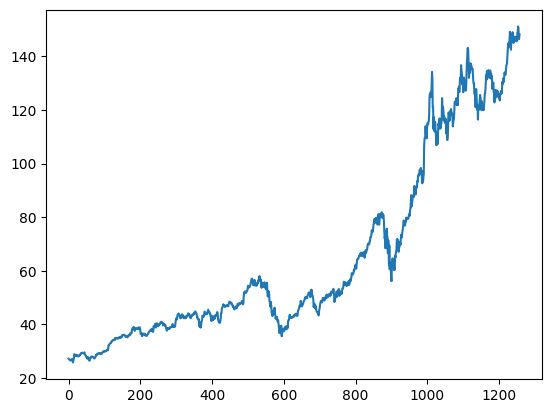

In [11]:

plt.plot(df1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.0114092 ],
       [0.00977362],
       [0.0088561 ],
       ...,
       [0.96202259],
       [0.96473523],
       [0.97662317]])

# DATA PREPROCESSING

In [14]:
training_dataset_size = int(len(df1)*0.75)
test_dataset_size=len(df1)-training_dataset_size

scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
train_data=df1[0:training_dataset_size,:]
test_data=df1[training_dataset_size:len(df1),:1]

In [17]:
training_dataset_size,test_dataset_size

(943, 315)

In [18]:
test_data

array([[0.43035809],
       [0.42604971],
       [0.42880222],
       [0.4290815 ],
       [0.42846318],
       [0.43626213],
       [0.43923408],
       [0.4427845 ],
       [0.4371996 ],
       [0.45551015],
       [0.45941957],
       [0.48042287],
       [0.49807521],
       [0.46428643],
       [0.47007081],
       [0.47842825],
       [0.49655929],
       [0.49558194],
       [0.49586122],
       [0.49185202],
       [0.51010274],
       [0.52538149],
       [0.51247633],
       [0.52201059],
       [0.49965097],
       [0.51590708],
       [0.52193079],
       [0.5205545 ],
       [0.5205545 ],
       [0.53998209],
       [0.53766833],
       [0.55498157],
       [0.55825276],
       [0.55958912],
       [0.55605868],
       [0.56866466],
       [0.57399024],
       [0.56439615],
       [0.56284035],
       [0.57903661],
       [0.56820587],
       [0.57037999],
       [0.53505538],
       [0.53322031],
       [0.55073303],
       [0.53830661],
       [0.5525681 ],
       [0.561

In [19]:
train_data

array([[0.0114092 ],
       [0.00977362],
       [0.0088561 ],
       [0.0075995 ],
       [0.00736014],
       [0.00572455],
       [0.00592401],
       [0.00718063],
       [0.00917524],
       [0.00911539],
       [0.01043184],
       [0.00476713],
       [0.        ],
       [0.00460758],
       [0.00961404],
       [0.01723347],
       [0.02481301],
       [0.02351651],
       [0.02084373],
       [0.02082378],
       [0.0207839 ],
       [0.02291814],
       [0.01910842],
       [0.01944749],
       [0.01986636],
       [0.02158173],
       [0.01805127],
       [0.01978659],
       [0.01872943],
       [0.01968685],
       [0.01978659],
       [0.02146206],
       [0.02180114],
       [0.02577044],
       [0.02626909],
       [0.02834347],
       [0.02762543],
       [0.02892191],
       [0.02876236],
       [0.02860278],
       [0.02790467],
       [0.02778498],
       [0.02686747],
       [0.02896181],
       [0.03015858],
       [0.0248529 ],
       [0.02263889],
       [0.021

In [22]:
import numpy
def create_dataset(dataset,time_step=1):
    X_data=[]
    Y_data=[]
    for i in range(len(dataset)- time_step -1):
        a=dataset[i:(i+time_step),0]
        X_data.append(a)
        Y_data.append(dataset[i+time_step,0])
    return numpy.array(X_data),numpy.array(Y_data)

In [23]:
time_step = 100
X_train_data,Y_train_data=create_dataset(train_data,time_step)
X_test_data,Y_test_data=create_dataset(test_data,time_step)
X_train_data,Y_train_data

(array([[0.0114092 , 0.00977362, 0.0088561 , ..., 0.0331505 , 0.0321532 ,
         0.03173433],
        [0.00977362, 0.0088561 , 0.0075995 , ..., 0.0321532 , 0.03173433,
         0.03364916],
        [0.0088561 , 0.0075995 , 0.00736014, ..., 0.03173433, 0.03364916,
         0.0336292 ],
        ...,
        [0.36076595, 0.36130447, 0.37255413, ..., 0.40793857, 0.41170842,
         0.40805825],
        [0.36130447, 0.37255413, 0.37233469, ..., 0.41170842, 0.40805825,
         0.4225192 ],
        [0.37255413, 0.37233469, 0.37576543, ..., 0.40805825, 0.4225192 ,
         0.41888905]]),
 array([0.03364916, 0.0336292 , 0.03321034, 0.03364916, 0.03380873,
        0.03358932, 0.03739902, 0.03751872, 0.03753865, 0.03690037,
        0.03634189, 0.05110203, 0.05066322, 0.05176026, 0.05417372,
        0.05664706, 0.0576643 , 0.05842227, 0.05782388, 0.06015757,
        0.06360828, 0.06458562, 0.06426651, 0.0650045 , 0.06695921,
        0.06777701, 0.06662014, 0.06687944, 0.06741797, 0.06753767,
 

In [24]:
X_test_data.shape , Y_test_data.shape

((214, 100), (214,))

# CREATING THE LSTM MODEL

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train_data,Y_train_data,validation_data=(X_test_data,Y_test_data),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 22s 587ms/step - loss: 0.0104 - val_loss: 0.1657
Epoch 2/100
14/14 [==============================] - 4s 251ms/step - loss: 0.0026 - val_loss: 0.0375
Epoch 3/100
14/14 [==============================] - 4s 256ms/step - loss: 8.4610e-04 - val_loss: 0.0048
Epoch 4/100
14/14 [==============================] - 4s 287ms/step - loss: 6.7766e-04 - val_loss: 0.0021
Epoch 5/100
14/14 [==============================] - 4s 280ms/step - loss: 6.3234e-04 - val_loss: 0.0050
Epoch 6/100
14/14 [==============================] - 4s 287ms/step - loss: 5.6975e-04 - val_loss: 0.0021
Epoch 7/100
14/14 [==============================] - 4s 279ms/step - loss: 5.4202e-04 - val_loss: 0.0018
Epoch 8/100
14/14 [==============================] - 4s 277ms/step - loss: 5.5650e-04 - val_loss: 0.0021
Epoch 9/100
14/14 [==============================] - 4s 279ms/step - loss: 5.1072e-04 - val_loss: 0.0017
Epoch 10/100
14/14 [==============================] - 4s 285ms

# Predicting test data and plotting the output

In [29]:
train_predict_data=model.predict(X_train_data)
test_predict_data=model.predict(X_test_data)

7/7 [==============================] - 1s 79ms/step


In [30]:
train_predict_data=scaler.inverse_transform(train_predict_data)
test_predict_data=scaler.inverse_transform(test_predict_data)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train_data,train_predict_data))

0.010137897898748575

<function matplotlib.pyplot.show(close=None, block=None)>

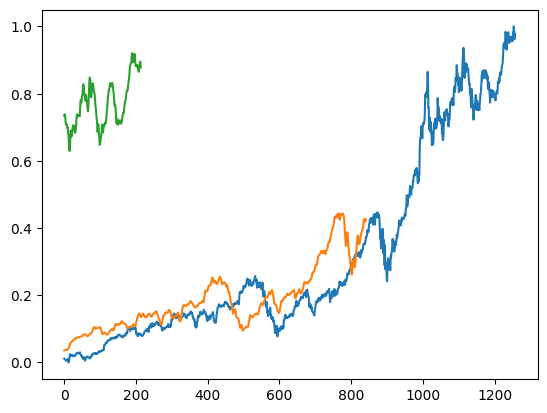

In [32]:
look_back=100
train_predicted_plots=numpy.empty_like(df1)
train_predicted_plots[:, :]=np.nan
train_predicted_plots[look_back:len(train_predict_data)+look_back,:]=train_predict_data
test_predicted_plots=numpy.empty_like(df1)
test_predicted_plots[:, :]=numpy.nan
test_predicted_plots[len(train_predict_data)+(look_back*2)+1:len(df1)-1,:]=test_predict_data
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_data)
plt.plot(test_predict_data)
plt.show


In [33]:
len(test_data)

315

In [34]:
len(train_data)

943

In [40]:
input_x = test_data[215:].reshape(1,-1)
input_x.shape

(1, 100)

In [41]:
new_input=list(input_x)
new_input=new_input[0].tolist()

In [42]:
new_input

[0.7688641154918237,
 0.7756457891898525,
 0.7987833345577608,
 0.8012566327318362,
 0.8147402513929272,
 0.8343672511217235,
 0.8554303733656845,
 0.8413883264430302,
 0.8668395130536195,
 0.8476912607221705,
 0.8673980609920593,
 0.8646854170439147,
 0.8701107049402041,
 0.8563080117700772,
 0.8594196025744762,
 0.8469732233999632,
 0.8659619943261034,
 0.8691533298223861,
 0.8665204225876668,
 0.8600578952047997,
 0.8592600014922909,
 0.8431436032518154,
 0.8517602266443876,
 0.8143412965582142,
 0.8163359749902774,
 0.8294206388166554,
 0.8331705302298362,
 0.8063628381406311,
 0.7988631350988533,
 0.7738107198184332,
 0.7913633602509498,
 0.8111499052127227,
 0.8017353242799745,
 0.7904059213054646,
 0.7891293998724851,
 0.8100329290127193,
 0.7950334431445798,
 0.8083574527450268,
 0.8067617929753439,
 0.8063628381406311,
 0.7938366664034839,
 0.78849111522062,
 0.7858582079859007,
 0.7920813975731571,
 0.779954164713806,
 0.7987035260382096,
 0.7987833345577608,
 0.8054852077146

In [43]:

first_output=[]
i=0
n_steps=100
while(i<30):
    if(len(new_input)>100):
        input_x = np.array(new_input[1:])
        print("{}day input{}".format(i,input_x))
        input_x=input_x.reshape(1,-1)
        input_x=input_x.reshape(1,n_steps,1)
        yhat=model.predict(input_x,verbose=0)
        print("{} day output {}".format(i,yhat))
        new_input.extend(yhat[0].tolist())
        new_input=new_input[1:]
        first_output.extend(yhat.tolist())
        i=i+1
    else:
        input_x=input_x.reshape(1,n_steps,1)
        yhat=model.predict(input_x,verbose=0)
        print(yhat[0])
        new_input.extend(yhat[0].tolist())
        print(len(new_input))
        first_output.extend(yhat.tolist())
        i=i+1
print(first_output)
        

[0.87348294]
101
1day input[0.77564579 0.79878333 0.80125663 0.81474025 0.83436725 0.85543037
 0.84138833 0.86683951 0.84769126 0.86739806 0.86468542 0.8701107
 0.85630801 0.8594196  0.84697322 0.86596199 0.86915333 0.86652042
 0.8600579  0.85926    0.8431436  0.85176023 0.8143413  0.81633597
 0.82942064 0.83317053 0.80636284 0.79886314 0.77381072 0.79136336
 0.81114991 0.80173532 0.79040592 0.7891294  0.81003293 0.79503344
 0.80835745 0.80676179 0.80636284 0.79383667 0.78849112 0.78585821
 0.7920814  0.77995416 0.79870353 0.79878333 0.80548521 0.8085968
 0.8004588  0.81035207 0.83532463 0.82862275 0.83269172 0.84577638
 0.83516514 0.84984548 0.86324923 0.86101527 0.85870157 0.85630801
 0.86963202 0.88199866 0.88702512 0.88949842 0.9109605  0.9273961
 0.94774119 0.93712983 0.95204951 0.94718265 0.95627808 0.98428243
 0.97893688 0.96226192 0.93082678 0.96034705 0.95436321 0.96553312
 0.97957517 0.98300596 0.96529378 0.95101227 0.95627808 0.95803336
 0.9553207  0.97000104 0.96672984 0.96

8 day output [[0.520854]]
9day input[0.84769126 0.86739806 0.86468542 0.8701107  0.85630801 0.8594196
 0.84697322 0.86596199 0.86915333 0.86652042 0.8600579  0.85926
 0.8431436  0.85176023 0.8143413  0.81633597 0.82942064 0.83317053
 0.80636284 0.79886314 0.77381072 0.79136336 0.81114991 0.80173532
 0.79040592 0.7891294  0.81003293 0.79503344 0.80835745 0.80676179
 0.80636284 0.79383667 0.78849112 0.78585821 0.7920814  0.77995416
 0.79870353 0.79878333 0.80548521 0.8085968  0.8004588  0.81035207
 0.83532463 0.82862275 0.83269172 0.84577638 0.83516514 0.84984548
 0.86324923 0.86101527 0.85870157 0.85630801 0.86963202 0.88199866
 0.88702512 0.88949842 0.9109605  0.9273961  0.94774119 0.93712983
 0.95204951 0.94718265 0.95627808 0.98428243 0.97893688 0.96226192
 0.93082678 0.96034705 0.95436321 0.96553312 0.97957517 0.98300596
 0.96529378 0.95101227 0.95627808 0.95803336 0.9553207  0.97000104
 0.96672984 0.96760748 0.96026731 0.95986836 0.955959   0.95803336
 0.98220807 0.9838836  1.     

16 day output [[0.04603992]]
17day input[0.86915333 0.86652042 0.8600579  0.85926    0.8431436  0.85176023
 0.8143413  0.81633597 0.82942064 0.83317053 0.80636284 0.79886314
 0.77381072 0.79136336 0.81114991 0.80173532 0.79040592 0.7891294
 0.81003293 0.79503344 0.80835745 0.80676179 0.80636284 0.79383667
 0.78849112 0.78585821 0.7920814  0.77995416 0.79870353 0.79878333
 0.80548521 0.8085968  0.8004588  0.81035207 0.83532463 0.82862275
 0.83269172 0.84577638 0.83516514 0.84984548 0.86324923 0.86101527
 0.85870157 0.85630801 0.86963202 0.88199866 0.88702512 0.88949842
 0.9109605  0.9273961  0.94774119 0.93712983 0.95204951 0.94718265
 0.95627808 0.98428243 0.97893688 0.96226192 0.93082678 0.96034705
 0.95436321 0.96553312 0.97957517 0.98300596 0.96529378 0.95101227
 0.95627808 0.95803336 0.9553207  0.97000104 0.96672984 0.96760748
 0.96026731 0.95986836 0.955959   0.95803336 0.98220807 0.9838836
 1.         0.99258009 0.96202259 0.96473523 0.97662317 0.87348294
 0.83133978 0.77998883 0

24 day output [[-0.15165067]]
25day input[ 0.82942064  0.83317053  0.80636284  0.79886314  0.77381072  0.79136336
  0.81114991  0.80173532  0.79040592  0.7891294   0.81003293  0.79503344
  0.80835745  0.80676179  0.80636284  0.79383667  0.78849112  0.78585821
  0.7920814   0.77995416  0.79870353  0.79878333  0.80548521  0.8085968
  0.8004588   0.81035207  0.83532463  0.82862275  0.83269172  0.84577638
  0.83516514  0.84984548  0.86324923  0.86101527  0.85870157  0.85630801
  0.86963202  0.88199866  0.88702512  0.88949842  0.9109605   0.9273961
  0.94774119  0.93712983  0.95204951  0.94718265  0.95627808  0.98428243
  0.97893688  0.96226192  0.93082678  0.96034705  0.95436321  0.96553312
  0.97957517  0.98300596  0.96529378  0.95101227  0.95627808  0.95803336
  0.9553207   0.97000104  0.96672984  0.96760748  0.96026731  0.95986836
  0.955959    0.95803336  0.98220807  0.9838836   1.          0.99258009
  0.96202259  0.96473523  0.97662317  0.87348294  0.83133978  0.77998883
  0.73253858

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
len(df1)

1258

In [47]:
df2=df1.tolist()
df2.extend(first_output)

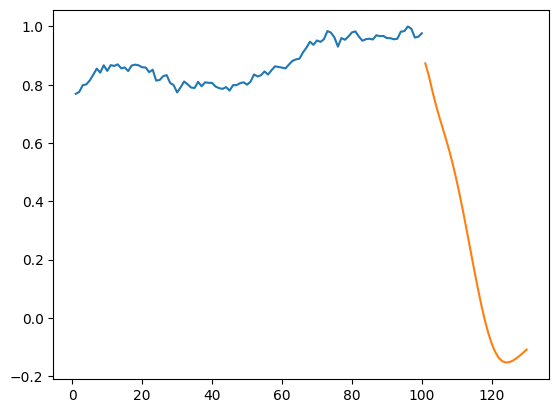

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(first_output));

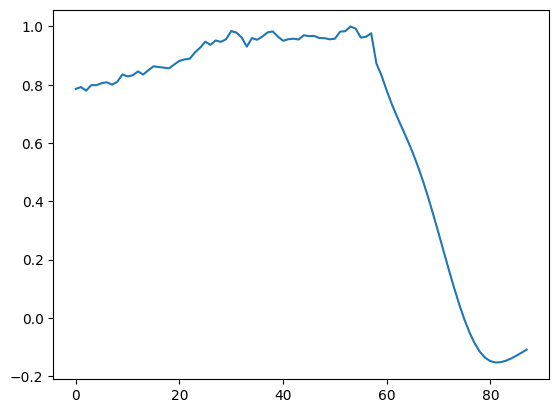

In [49]:
df4=df1.tolist()
df4.extend(first_output)
plt.plot(df4[1200:])

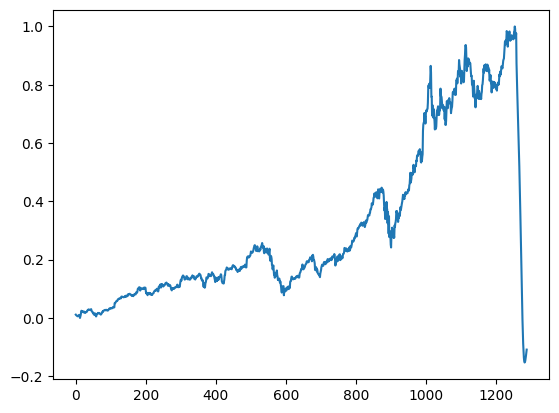

In [50]:
df4=scaler.inverse_transform(df4).tolist()
plt.plot(df4)